<a href="https://colab.research.google.com/github/Kawin101/935442-ImageProcessing/blob/main/935442_Final_Lab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-1-1f4c711d9558>:14: RuntimeWarning: divide by zero encountered in log
  log = 1*np.log(gray+1)


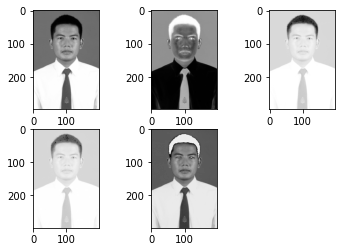

In [1]:
# 1.1 negative gamma logarithm threshold 
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray = cv2.imread('/content/studentphoto.jpg',0)

# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# negative image
neg = 255 - gray

# logarithm image
log = 1*np.log(gray+1)

# gamma image
gamma = 255*(gray/255) **0.2
gamma = np.array(gamma, dtype=np.uint8)

# threshold image
_,bw = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)
t = 20
# gray2 = gray + t
gray2 = gray - t

# display image
plt.subplot(231), plt.imshow(gray, cmap='gray')
plt.subplot(232), plt.imshow(neg, cmap='gray')
plt.subplot(233), plt.imshow(log, cmap='gray')
plt.subplot(234), plt.imshow(gamma, cmap='gray')
plt.subplot(235), plt.imshow(gray2, cmap='gray')

plt.show()

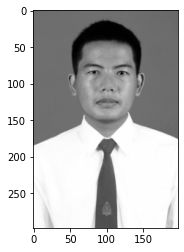

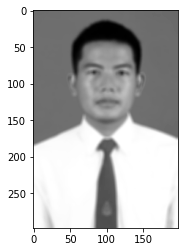

In [2]:
# 1.2 image smoothing
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Average filtering
img = cv2.imread("/content/studentphoto.jpg",0)
f = np.ones((5,5), np.float32)/25
avg = cv2.filter2D(img, -1, f)
plt.imshow(img, cmap = "gray")
plt.show()
plt.imshow(avg, cmap = "gray")
plt.show()

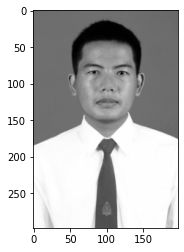

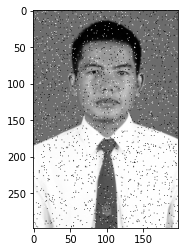

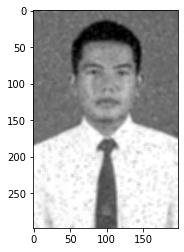

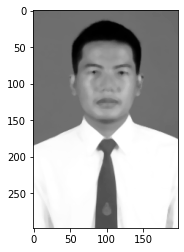

In [3]:
# 1.3 image sharpening
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

img = cv2.imread('/content/studentphoto.jpg', 0)
plt.imshow(img, cmap='gray')
plt.show()
# Create average filter size (5x5)
#f = np.ones((5,5), np.float32)/25
#smoothing = cv2.filter2D(img, -1,f) # Apply filter to image
# medianblur = cv2.medianBlur(img,5) # Apply median filter to image
# plt.imshow(medianblur, cmap='gray')
# plt.show()

#noisy_gau = random_noise(img, mode='gaussian')
#plt.imshow(noisy_gau, cmap='gray')
#plt.show()
noisy_sp = random_noise(img, mode='s&p')
plt.imshow(noisy_sp, cmap='gray')
plt.show()
#noisy_pos = random_noise(img, mode='poisson')
#plt.imshow(noisy_pos, cmap='gray')
#plt.show()

f = np.ones((5,5), np.float32)/25
avgblur = cv2.filter2D(noisy_sp, -1,f)
medianblur = cv2.medianBlur(img,5) # Apply median filter to image

plt.imshow(avgblur, cmap='gray')
plt.show()

plt.imshow(medianblur, cmap='gray')
plt.show()

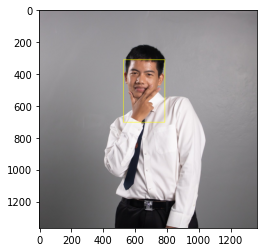

In [4]:
# 2.1 Morphological operations
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/content/kawinphop-2019.jpg') 
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î ‡∏ä‡πà‡∏ß‡∏á ‡∏Ñ‡πà‡∏≤ ‡∏™‡∏µ ‡∏ó‡∏µ‡πà ‡πÄ‡∏õ‡πá‡∏ô‡πÑ‡∏õ‡πÑ‡∏î‡πâ ‡∏Ç‡∏≠‡∏á ‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏ ‡∏´‡∏£‡∏∑‡∏≠ ‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤ (‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î ‡∏Ñ‡πà‡∏≤‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î)
# Suggess = low_color = (120 100 60), upper_color = (240 240 240)


lower_color = np.array([80,90,160], dtype='uint8') # BGR 
upper_color = np.array([120,150,220], dtype='uint8') # rgb(197,136,108)
obj = cv2.inRange(img, lower_color, upper_color)

st  = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# iterations ‡∏Ç‡∏¢‡∏≤‡∏¢‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏†‡∏≤‡∏û ‡∏´‡∏ô‡∏∂‡πà‡∏á‡∏Ñ‡∏£‡∏±‡πâ‡∏á
obj1 = cv2.dilate(obj, st, iterations=5)

regions, hierarchy = cv2.findContours(obj1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for r in regions:
  (x,y,w,h) = cv2.boundingRect(r)
  if w*h > 25000:
    cv2.rectangle(imgRGB, (x,y), (x+w,y+h), (255,255,0), 2)

plt.imshow(imgRGB)
plt.show()

# plt.imshow(obj1, cmap='gray')
# plt.show()

In [6]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.3/2.3 MB 28.9 MB/s eta 0:00:00


1/1 [==============================] - 0s 367ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

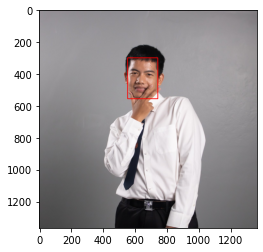

In [7]:
# 2.2.1 ‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏≤‡∏£‡∏Ç‡∏≠‡∏á‡∏õ‡∏±‡∏ç‡∏ç‡∏≤‡∏õ‡∏£‡∏∞‡∏î‡∏¥‡∏©‡∏ê‡πå‡∏´‡∏£‡∏∑‡∏≠ AI ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏Ç‡∏≠‡∏á‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤‡∏ï‡∏ô‡πÄ‡∏≠‡∏á 

# ‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡πÅ‡∏£‡∏Å‡πÜ ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

img = cv2.imread('/content/kawinphop-2019.jpg') # BGR
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô RGB ‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢

faceDectector = MTCNN() # ‡πÄ‡∏£‡∏µ‡∏¢‡∏Å‡πÉ‡∏ä‡πâ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô MTCNN()
faces = faceDectector.detect_faces(imgRGB) # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏ô‡∏≥‡πÄ‡∏Ç‡πâ‡∏≤‡πÄ‡∏õ‡πá‡∏ô ‡∏†‡∏≤‡∏û‡πÅ‡∏ö‡∏ö‡∏ó‡∏µ‡πà‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô RGB ‡πÄ‡∏™‡∏£‡πá‡∏à‡πÅ‡∏•‡πâ‡∏ß

# ‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏•‡∏á face ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ä‡∏∑‡πà‡∏≠‡πÑ‡∏î‡πâ
for face in faces:
  (x, y, w, h) = face['box'] # list [array]
  # w ‡∏Å‡∏ß‡πâ‡∏≤‡∏á, h ‡∏™‡∏π‡∏á, x y ‡∏à‡∏∏‡∏î‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô, ‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏ï‡∏µ‡∏Å‡∏£‡∏≠‡∏ö ‡∏£‡∏≠‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤ ‡πÄ‡∏õ‡πá‡∏ô‡∏™‡∏µ‡πÅ‡∏î‡∏á RGB(r,g,b), 10 ‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡∏µ‡∏Å‡∏£‡∏≠‡∏ö
  cv2.rectangle(imgRGB,(x,y),(x+w,y+h),(255,0,0),4)

plt.imshow(imgRGB) # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•
plt.show

*   **Yolo family (You Only Look One)**

In [8]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 10324, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 10324 (delta 110), reused 148 (delta 52), pack-reused 10078
Receiving objects: 100% (10324/10324), 9.70 MiB | 22.06 MiB/s, done.
Resolving deltas: 100% (6909/6909), done.


In [9]:
%cd yolov3

/content/yolov3


In [ ]:
%pip install -qr requirements.txt # install

In [11]:
# 2.2.2 ‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏≤‡∏£‡∏Ç‡∏≠‡∏á‡∏õ‡∏±‡∏ç‡∏ç‡∏≤‡∏õ‡∏£‡∏∞‡∏î‡∏¥‡∏©‡∏ê‡πå‡∏´‡∏£‡∏∑‡∏≠ AI ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏Ç‡∏≠‡∏á‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤‡∏ï‡∏ô‡πÄ‡∏≠‡∏á

# Yolo family (You Only Look One)
import torch
from yolov3 import utils
display = utils.notebook_init() # checks
# !python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source 'image'
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source '/content/kawinphop-2019.jpg'

YOLOv3 üöÄ v9.6.0-47-gd94c261 Python-3.9.16 torch-1.13.1+cu116 CPU


Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 25.5/107.7 GB disk)
detect: weights=['yolov3.pt'], source=/content/kawinphop-2019.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 üöÄ v9.6.0-47-gd94c261 Python-3.9.16 torch-1.13.1+cu116 CPU

100% 119M/119M [00:01<00:00, 114MB/s]

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/kawinphop-2019.jpg: 640x640 1 person, 1 tie, 3685.9ms
Speed: 7.5ms pre-process, 3685.9ms inference, 22.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
# https://colab.research.google.com/github/sudo-ken/compress-decompress-in-Google-Drive/blob/master/Unrar_Unzip_Rar_Zip_in_GDrive.ipynb
# !unrar x "/content/drive/MyDrive/" "/content/drive/MyDrive/"

# !unzip "/content/training.zip" -d "/content/"
!unzip "/content/data.zip" -d "/content/"

In [2]:
# 3. ‡πÉ‡∏´‡πâ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å Download ‡∏†‡∏≤‡∏û‡∏à‡∏≤‡∏Å‡πÄ‡∏ß‡πá‡∏ö‡πÑ‡∏ã‡∏ï‡πå‡∏à‡∏≤‡∏Å‡∏≠‡∏¥‡∏ô‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏ô‡πá‡∏ï ‡∏°‡∏≤ 2 ‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó ‡πÜ ‡∏•‡∏∞ 20 ‡∏†‡∏≤‡∏û ‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏£‡∏π‡πâ‡∏à‡∏≥‡∏†‡∏≤‡∏û‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏≤‡∏£‡∏Ç‡∏≠‡∏á‡∏õ‡∏±‡∏ç‡∏ç‡∏≤‡∏õ‡∏£‡∏∞‡∏î‡∏¥‡∏©‡∏ê‡πå‡∏´‡∏£‡∏∑‡∏≠ AI

# 20 Image with different 2 Type
# https://teachablemachine.withgoogle.com/

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = VGG16(include_top=False, input_shape=(224,224,3))
for layer in model.layers:
  layer.trainable = False

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
model = Model(inputs=model.inputs, outputs=output)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean=[123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory('/content/data/training', class_mode='binary',batch_size=16,target_size=(224,224))

# epochs=50 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏£‡∏≠‡∏ö‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏ô‡∏ù‡∏ô ‡∏Ñ‡∏∑‡∏≠ 50 ‡∏£‡∏≠‡∏ö
model.fit(train_it,steps_per_epoch=len(train_it),epochs=50,verbose=0)

58889256/58889256 [==============================] - 2s 0us/step


Found 40 images belonging to 2 classes.


In [4]:
# 3. ‡πÉ‡∏´‡πâ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å Download ‡∏†‡∏≤‡∏û‡∏à‡∏≤‡∏Å‡πÄ‡∏ß‡πá‡∏ö‡πÑ‡∏ã‡∏ï‡πå‡∏à‡∏≤‡∏Å‡∏≠‡∏¥‡∏ô‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏ô‡πá‡∏ï ‡∏°‡∏≤ 2 ‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó ‡πÜ ‡∏•‡∏∞ 20 ‡∏†‡∏≤‡∏û ‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏£‡∏π‡πâ‡∏à‡∏≥‡∏†‡∏≤‡∏û‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏≤‡∏£‡∏Ç‡∏≠‡∏á‡∏õ‡∏±‡∏ç‡∏ç‡∏≤‡∏õ‡∏£‡∏∞‡∏î‡∏¥‡∏©‡∏ê‡πå‡∏´‡∏£‡∏∑‡∏≠ AI

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

testImg = load_img('/content/data/test/avotest01.jpg',target_size=(224,224))
img = img_to_array(testImg)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img- [123.68, 116.779, 103.939]
result = model.predict(img)
if result == 1:
  result = 'blueberry'
else:
  result = 'avocado'
print(result)

1/1 [==============================] - 0s 82ms/step
avocado
